# 课堂复现

# 数据准备

In [1]:
import pandas as pd # 数据表
df = pd.read_excel('text_analysis_ad.xlsx', index_col = 0)
df

,index,商品名称,商品类别,出版年,广告文本,广告标题
0,1596,五华牌香烟[May Blossom],烟草制品,1932,兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟 二十枝装每包售国币大洋二角 五十枝装每罐售国币...,"五华牌香烟,""兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟"""
1,5627,韦廉士红色清导丸[Dr.Willams' Pink Pills For Pale People],药品,1918,讲求卫生为人生本性天理固然也 人生首贵逐日大便通畅有序为天然所当如此也如若大便不利大肠阻塞则...,韦廉士红色清导丸:'讲求卫生为人生本性天理固然也'
2,13532,大炮台香烟[Three Castles Cigarettes],烟草制品,1935,"香味馥郁,不让名花 另有三炮台出售","大炮台香烟,""香味馥郁 不让名花"""
3,1133,婴孩自己药片[Baby's Own],药品,1930,差肩儿女 秀慧康强 闽有佳音讃羡婴孩自己药片 每年此际小儿患肠胃病者甚多而尤以南方各地天气翳...,"婴孩自己药片,""差肩儿女 秀慧康强 闽有佳音赞美婴孩自己药片"""
4,3146,亚士北罗药片[Aspro],药品,1933,何以亚士北罗是妇女们的腻友？各国妇女力证亚士北罗药片是她们最需要的药物！为什么？她们的经验知...,"亚士北罗药片,""妇女之腻友"""
...,...,...,...,...,...,...
495,14176,安住蚊烟香,化肥及杀虫剂,1935,安住蚊烟香 臭虫立毙药粉 世界第一名产 安住蚊烟香 蚊见逃慌慌 暑夜不用帐 包睡到天光 汉口...,"安住蚊烟香,""世界第一名产"""
496,11610,第威德润肠丸[DeWitt's],药品,1934,眉色清秀 气色壮旺 此第威德润肠丸之功也 第威德润肠丸系以草药炼制纯粹和平十分安全功能清理肠...,"第威德润肠丸,""眉色清秀 气色壮旺"""
497,10256,如意膏[She-Ko],药品,1934,汤火烫伤 立攃如意膏可免严重之后果 皮肤受伤当以灼烫最痛苦其又因此震激而致命者治疗灼烫止痛消...,"如意膏,""汤火烫伤 立攃如意膏可免严重之后果"""
498,9176,六零六药膏,药品,1923,清血解毒六零六 花柳梅毒瘰*疮疖癣疥**及筋骨酸痛四肢麻木半身疯*等症状虽异其发生之原理莫不...,"六零六,""清血解毒六零六"""


In [2]:
# 分词
import jieba # 中文分词

def clean_text(text):
    words = jieba.lcut(text)    
    return ' '.join(words)
    
test = df['广告文本'][0]
clean_text(test)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\123\AppData\Local\Temp\jieba.cache
Loading model cost 1.018 seconds.
Prefix dict has been built successfully.


'兰勃 脱白 脱勒 公司   五华 牌 香烟   佛及 尼埃 香烟     二十 枝装 每包 售 国币 大洋 二角   五十 枝装 每罐 售 国币 大洋   五角'

In [3]:
df['广告文本分词'] = df['广告文本'].apply(clean_text)
df

,index,商品名称,商品类别,出版年,广告文本,广告标题,广告文本分词
0,1596,五华牌香烟[May Blossom],烟草制品,1932,兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟 二十枝装每包售国币大洋二角 五十枝装每罐售国币...,"五华牌香烟,""兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟""",兰勃 脱白 脱勒 公司 五华 牌 香烟 佛及 尼埃 香烟 二十 枝装 每包 ...
1,5627,韦廉士红色清导丸[Dr.Willams' Pink Pills For Pale People],药品,1918,讲求卫生为人生本性天理固然也 人生首贵逐日大便通畅有序为天然所当如此也如若大便不利大肠阻塞则...,韦廉士红色清导丸:'讲求卫生为人生本性天理固然也',讲求 卫生 为 人生 本性 天理 固然 也 人生 首贵 逐日 大便 通畅 有序 为 天然...
2,13532,大炮台香烟[Three Castles Cigarettes],烟草制品,1935,"香味馥郁,不让名花 另有三炮台出售","大炮台香烟,""香味馥郁 不让名花""","香味 馥郁 , 不让 名花 另 有 三 炮台 出售"
3,1133,婴孩自己药片[Baby's Own],药品,1930,差肩儿女 秀慧康强 闽有佳音讃羡婴孩自己药片 每年此际小儿患肠胃病者甚多而尤以南方各地天气翳...,"婴孩自己药片,""差肩儿女 秀慧康强 闽有佳音赞美婴孩自己药片""",差肩 儿女 秀慧 康强 闽有 佳音 讃 羡 婴孩 自己 药片 每年 此际 小儿 ...
4,3146,亚士北罗药片[Aspro],药品,1933,何以亚士北罗是妇女们的腻友？各国妇女力证亚士北罗药片是她们最需要的药物！为什么？她们的经验知...,"亚士北罗药片,""妇女之腻友""",何以 亚士 北罗 是 妇女 们 的 腻友 ？ 各国 妇女 力证 亚士 北罗 药片 是 她们 ...
...,...,...,...,...,...,...,...
495,14176,安住蚊烟香,化肥及杀虫剂,1935,安住蚊烟香 臭虫立毙药粉 世界第一名产 安住蚊烟香 蚊见逃慌慌 暑夜不用帐 包睡到天光 汉口...,"安住蚊烟香,""世界第一名产""",安住 蚊烟香 臭虫 立毙 药粉 世界 第一名 产 安住 蚊烟香 蚊见 逃 慌...
496,11610,第威德润肠丸[DeWitt's],药品,1934,眉色清秀 气色壮旺 此第威德润肠丸之功也 第威德润肠丸系以草药炼制纯粹和平十分安全功能清理肠...,"第威德润肠丸,""眉色清秀 气色壮旺""",眉色 清秀 气色 壮旺 此 第 威德 润肠 丸 之功 也 第 威德 润肠 丸系 ...
497,10256,如意膏[She-Ko],药品,1934,汤火烫伤 立攃如意膏可免严重之后果 皮肤受伤当以灼烫最痛苦其又因此震激而致命者治疗灼烫止痛消...,"如意膏,""汤火烫伤 立攃如意膏可免严重之后果""",汤火 烫伤 立 攃 如意 膏 可免 严重 之 后果 皮肤 受伤 当以 灼烫 最 痛苦...
498,9176,六零六药膏,药品,1923,清血解毒六零六 花柳梅毒瘰*疮疖癣疥**及筋骨酸痛四肢麻木半身疯*等症状虽异其发生之原理莫不...,"六零六,""清血解毒六零六""",清血 解毒 六零 六 花柳 梅毒 瘰 * 疮 疖 癣疥 * * 及 筋骨 酸痛 四肢 麻...


# 词向量模型

### 词向量（Word Vectors）是将词语映射到向量空间，使其成为向量空间中的一个点。在这个空间中，语义上相似的单词在空间中的距离也相近。在这个向量空间中，每个词语都用一个向量表示，这个向量是多维的，并且每一维都是一个实数。这就是所谓“单个词语的词向量”。

### 使用词向量，我们可以进行各种文本分析任务，如文本分类、情感分析、文本相似度计算等。通过计算两个词向量之间的余弦相似度，我们可以得到这两个词语在语义上的相似度。

In [4]:
from gensim.test.utils import common_texts
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [5]:
corpus = df['广告文本分词'].apply(lambda x: x.split()).tolist() # 切分词语
for document in corpus[:5]:
    print(document)

['兰勃', '脱白', '脱勒', '公司', '五华', '牌', '香烟', '佛及', '尼埃', '香烟', '二十', '枝装', '每包', '售', '国币', '大洋', '二角', '五十', '枝装', '每罐', '售', '国币', '大洋', '五角']
['讲求', '卫生', '为', '人生', '本性', '天理', '固然', '也', '人生', '首贵', '逐日', '大便', '通畅', '有序', '为', '天然', '所当', '如此', '也', '如若', '大便', '不利', '大', '肠阻塞', '则', '胃失', '消化', '疾病', '头痛', '肝火', '上升', '胆汁', '不', '调', '口气', '积浊', '舌现', '黄苔', '诸恙', '接踵', '而', '起', '矣', '凡', '此皆须', '服用', '韦廉士', '大', '医生', '红色', '清导丸', '以利', '大便', '俾得', '体质', '强健', '百病', '不侵', '也况', '此丸', '之', '功力', '天然', '平和', '不尚', '霸烈', '广东省', '城', '医生', '学', '研究会', '*', '生', '先生', '来示', '云弟', '患大', '便秘', '结之症', '一月', '有余', '困苦', '万状', '难以', '言喻', '服用', '韦廉士', '红色', '清导丸', '数粒', '大便', '畅达', '于是', '常为', '服用', '身体', '爽健为', '半生', '以来', '所', '未有', '也', '如', '尊处', '无从', '购买', '韦廉士', '红色', '清导丸', '祈即', '邮票', '大洋', '六角', '至', '上海', '四川', '路', '九十六', '号', '韦廉士', '医生', '药局', '原班', '邮奉', '一瓶', '可', '也']
['香味', '馥郁', ',', '不让', '名花', '另', '有', '三', '炮台', '出售']
['差肩', '儿女', '秀慧', '康强', '闽有', '佳音', '讃', '羡', '婴孩

In [6]:
# 自己训练词嵌入模型
from gensim.models import Word2Vec

# 训练词嵌入模型
model = Word2Vec(
    corpus,     # 训练预料
    window = 5,     # 训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
    vector_size = 100,     # 自定义训练向量维度
    min_count = 1,     # 忽略所有总频数低于这个值的词语
    epochs = 10
)

# 保存训练好的模型
model.save('word2vec_ad.model')

In [7]:
word_list = model.wv.index_to_key  # 获取词汇表
word_vectors = model.wv[word_list]  # 获取词向量

# 打印词汇表和对应的词向量
for word, vector in list(zip(word_list, word_vectors))[:5]:
    print(f'{word}: {vector}')

之: [-0.6405334   1.1345379   0.5837885  -0.35474584 -0.48707938 -2.2502837
  0.83318853  3.223926   -1.3335258  -1.3875473  -0.36918098 -1.9192832
 -0.13127716  1.1842606   0.5985036  -0.7044302   0.2795693  -0.54849774
  0.02242999 -2.2247953   1.1001595  -0.04516391  0.6378996  -0.9381929
  0.03338053 -0.0518756  -0.41352972 -1.0431157  -0.8452471  -0.05983698
  0.97242963  0.5250756   0.2337113  -0.93265975 -0.69288355  1.6193233
  0.535838   -0.982698   -1.0129508  -2.3672059  -0.01009748 -0.63647693
 -0.03528106 -0.82785404  0.9390904  -0.7972345  -1.3927542   0.3391661
  1.1424915   0.6580113   0.28211415 -0.29982337 -1.067966   -0.12642632
 -0.41562557  0.8268412   0.31384256 -0.00930985 -0.70938396  0.5249539
  0.35826784  0.43344054 -0.39170772  0.7060562  -0.8864386   1.4626446
  0.25006402  0.94690704 -1.376416    1.6029191  -0.7605522   1.2804277
  0.74878633 -0.0380533   1.7060019   0.3636751   0.12269175 -0.16926728
 -0.45017433  0.9174751  -0.42839304  0.0250578  -0.9094

In [9]:
# 检查词嵌入模型中任意两个词向量的余弦相似度，即语义接近性
# 余弦相似度的取值介于[-1, 1]之间，-1表示语义完全相反，1表示语义完全相同，0表示毫无关系
# model.sv.similarity这个函数与np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))的输出结果一致
print(model.wv.similarity('医生', '疼痛'))
print(model.wv.similarity('医生', '神经'))
print(model.wv.similarity('医生', '伤风'))
print(model.wv.similarity('疼痛', '神经'))
print(model.wv.similarity('疼痛', '伤风'))
print(model.wv.similarity('神经', '伤风'))

0.718604
0.66677177
0.653183
0.9946365
0.9927541
0.996019


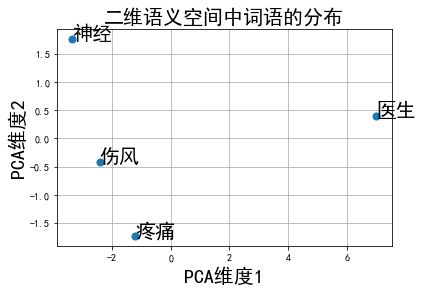

In [10]:
# 可视化

words = ['医生', '疼痛', '神经', '伤风']
vectors = [model.wv[word] for word in words]

from sklearn.decomposition import PCA     # 语义空间降维，用于展示词语在二维空间的相对位置

# 使用PCA进行降维
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(vectors)

import matplotlib.pyplot as plt     # 画图

# 绘制四个词语在二维空间的相对位置
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure()

# 取PCA降维结果中所有行的第一列和第二列数据绘制散点图，设置点的大小为50
plt.scatter(pca_result[:, 0], pca_result[:, 1], s = 50)

for i, word in enumerate(words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize = 20)

plt.xlabel('PCA维度1', fontsize = 20)
plt.ylabel('PCA维度2', fontsize = 20)
plt.title('二维语义空间中词语的分布', fontsize = 20)
plt.grid(True)
plt.show()

In [11]:
from gensim.models.callbacks import CallbackAny2Vec

class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 0
        self.loss_to_be_subed = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        loss_now = loss - self.loss_to_be_subed
        self.loss_to_be_subed = loss
        print('Loss after epoch {}: {}'.format(self.epoch, loss_now))
        self.epoch += 1
        
# 自己训练词嵌入模型
from gensim.models import Word2Vec

# 训练词嵌入模型
model = Word2Vec(
    corpus,     # 训练预料
    window = 5,     # 训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
    vector_size = 100,     # 自定义训练向量维度
    min_count = 1,     # 忽略所有总频数低于这个值的词语
    compute_loss=True, callbacks=[callback()],
    epochs = 50
)

# 保存训练好的模型
model.save('word2vec_ad.model')

Loss after epoch 0: 78609.65625
Loss after epoch 1: 78259.546875
Loss after epoch 2: 73424.703125
Loss after epoch 3: 62420.53125
Loss after epoch 4: 55146.5625
Loss after epoch 5: 51669.3125
Loss after epoch 6: 43957.9375
Loss after epoch 7: 41690.53125
Loss after epoch 8: 46145.65625
Loss after epoch 9: 44754.0625
Loss after epoch 10: 43449.4375
Loss after epoch 11: 36879.25
Loss after epoch 12: 40944.625
Loss after epoch 13: 39753.4375
Loss after epoch 14: 38561.8125
Loss after epoch 15: 33562.8125
Loss after epoch 16: 36195.5625
Loss after epoch 17: 30757.5
Loss after epoch 18: 29939.625
Loss after epoch 19: 29024.5625
Loss after epoch 20: 28435.9375
Loss after epoch 21: 27634.125
Loss after epoch 22: 31045.5
Loss after epoch 23: 26456.4375
Loss after epoch 24: 29507.5
Loss after epoch 25: 28771.375
Loss after epoch 26: 25442.125
Loss after epoch 27: 24024.75
Loss after epoch 28: 27163.0
Loss after epoch 29: 26597.75
Loss after epoch 30: 26246.0
Loss after epoch 31: 22377.0
Loss af

# 自主练习

# 数据准备

In [12]:
import pandas as pd # 数据表
df = pd.read_csv('《消失的她》豆瓣短评数据.csv', index_col = 0)
df

,评价,评论,评论时间,评论地点,评论点赞数
评论者网名,,,,,
淹死海星的凶手,还行,如果一个谋杀老婆的男人却为了无意谋杀了自己的孩子而流泪，这不是很讽刺吗,2023-06-22 13:04:14,江苏,28211.0
申报记者何书桓,较差,倪妮的角色是个T吧，《铁T复仇记》。,2023-06-20 00:08:16,北京,17443.0
ฅ ฅ,推荐,其实我觉得男主最后看到b超照片崩溃不是因为看到了孩子的存在，杀了老婆眼都不眨一下的恶魔只会崩...,2023-06-22 21:13:50,吉林,21534.0
orangesavage,推荐,建议情人节档安排上，更适合情侣宝宝的好电影❤️,2023-06-21 20:42:27,广东,19532.0
树木夕凉,还行,故事看20分钟就能猜到，表演上，倪妮好似没什么信念感，朱一龙则是信念感过足了。导演对声光的滥...,2023-06-15 20:45:02,北京,18004.0
...,...,...,...,...,...
小夜子,力荐,太牛了啊。颠覆性表演啊 。,2023-04-23 20:58:25,北京,1570.0
仿真男孩哪吒,较差,好久没看到过这么假模假式并离谱的电影了,2023-06-23 20:05:35,宁夏,258.0
思小泡,还行,渣男的一滴泪是为了肚子里的孩子？我不相信。以及彩蛋真的莫名其妙极了🤷,2023-07-02 23:35:47,北京,50.0


In [13]:
# 分词
import jieba # 中文分词

def clean_text(text):
    words = jieba.lcut(text)    
    return ' '.join(words)
    
test = df['评论'][0]
clean_text(test)

'如果 一个 谋杀 老婆 的 男人 却 为了 无意 谋杀 了 自己 的 孩子 而 流泪 ， 这 不是 很 讽刺 吗'

In [16]:
df['评论分词'] = df['评论'].astype(str).apply(clean_text)
df

,评价,评论,评论时间,评论地点,评论点赞数,评论分词
评论者网名,,,,,,
淹死海星的凶手,还行,如果一个谋杀老婆的男人却为了无意谋杀了自己的孩子而流泪，这不是很讽刺吗,2023-06-22 13:04:14,江苏,28211.0,如果 一个 谋杀 老婆 的 男人 却 为了 无意 谋杀 了 自己 的 孩子 而 流泪 ， 这...
申报记者何书桓,较差,倪妮的角色是个T吧，《铁T复仇记》。,2023-06-20 00:08:16,北京,17443.0,倪妮 的 角色 是 个 T 吧 ， 《 铁 T 复仇记 》 。
ฅ ฅ,推荐,其实我觉得男主最后看到b超照片崩溃不是因为看到了孩子的存在，杀了老婆眼都不眨一下的恶魔只会崩...,2023-06-22 21:13:50,吉林,21534.0,其实 我 觉得 男主 最后 看到 b 超 照片 崩溃 不是 因为 看到 了 孩子 的 存在 ...
orangesavage,推荐,建议情人节档安排上，更适合情侣宝宝的好电影❤️,2023-06-21 20:42:27,广东,19532.0,建议 情人节 档 安排 上 ， 更 适合 情侣 宝宝 的 好 电影 ❤ ️
树木夕凉,还行,故事看20分钟就能猜到，表演上，倪妮好似没什么信念感，朱一龙则是信念感过足了。导演对声光的滥...,2023-06-15 20:45:02,北京,18004.0,故事 看 20 分钟 就 能 猜 到 ， 表演 上 ， 倪妮 好似 没什么 信念 感 ， 朱...
...,...,...,...,...,...,...
小夜子,力荐,太牛了啊。颠覆性表演啊 。,2023-04-23 20:58:25,北京,1570.0,太牛 了 啊 。 颠覆性 表演 啊 。
仿真男孩哪吒,较差,好久没看到过这么假模假式并离谱的电影了,2023-06-23 20:05:35,宁夏,258.0,好久没 看到 过 这么 假模假式 并 离谱 的 电影 了
思小泡,还行,渣男的一滴泪是为了肚子里的孩子？我不相信。以及彩蛋真的莫名其妙极了🤷,2023-07-02 23:35:47,北京,50.0,渣 男 的 一滴 泪是 为了 肚子 里 的 孩子 ？ 我 不 相信 。 以及 彩蛋 真的 莫...


# 词向量模型

In [17]:
from gensim.test.utils import common_texts
corpus = df['评论分词'].apply(lambda x: x.split()).tolist() # 切分词语
for document in corpus[:5]:
    print(document)

['如果', '一个', '谋杀', '老婆', '的', '男人', '却', '为了', '无意', '谋杀', '了', '自己', '的', '孩子', '而', '流泪', '，', '这', '不是', '很', '讽刺', '吗']
['倪妮', '的', '角色', '是', '个', 'T', '吧', '，', '《', '铁', 'T', '复仇记', '》', '。']
['其实', '我', '觉得', '男主', '最后', '看到', 'b', '超', '照片', '崩溃', '不是', '因为', '看到', '了', '孩子', '的', '存在', '，', '杀', '了', '老婆', '眼都', '不', '眨', '一下', '的', '恶魔', '只会', '崩溃', '在', '明明', '可以', '轻松', '地', '就', '得到', '一切', '，', '结果', '现在', '命', '搭', '上', '了', '煮熟', '的', '鸭子', '还', '在', '不知情', '的', '情况', '下飞', '了', '所以', '他', '才', '崩溃', '，', '他', '怎么', '可能', '在意', '孩子', '的', '死活', '，', '只是', '他悔', '在', '这', '一切', '居然', '本', '就', '已经', '是', '他', '的', '但他却', '费尽心思', '策划', '了', '这', '一切', '还', '把', '自己', '搭进去', '了', '，', '说到底', '还是', '一个', '彻头彻尾', '的', '人渣']
['建议', '情人节', '档', '安排', '上', '，', '更', '适合', '情侣', '宝宝', '的', '好', '电影', '❤', '️']
['故事', '看', '20', '分钟', '就', '能', '猜', '到', '，', '表演', '上', '，', '倪妮', '好似', '没什么', '信念', '感', '，', '朱一龙', '则', '是', '信念', '感过', '足', '了', '。', '导演', '对', '声光', '的', '滥用'

In [18]:
# 自己训练词嵌入模型
from gensim.models import Word2Vec

# 训练词嵌入模型
model = Word2Vec(
    corpus,     # 训练预料
    window = 5,     # 训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
    vector_size = 100,     # 自定义训练向量维度
    min_count = 1,     # 忽略所有总频数低于这个值的词语
    epochs = 10
)

# 保存训练好的模型
model.save('word2vec_ad.model')

In [30]:
###
1.sentences：可以是一个List，对于大语料集，建议使用BrownCorpus,Text8Corpus或·ineSentence构建。
2.sg： 用于设置训练算法，默认为0，对应CBOW算法；sg=1则采用skip-gram算法。
3.size：是指输出的词的向量维数，默认为100。大的size需要更多的训练数据,但是效果会更好. 推荐值为几十到几百。
4.window：为训练的窗口大小，8表示每个词考虑前8个词与后8个词（实际代码中还有一个随机选窗口的过程，窗口大小<=5)，默认值为5。
5.alpha: 是学习速率
6.seed：用于随机数发生器。与初始化词向量有关。
7.min_count: 可以对字典做截断. 词频少于min_count次数的单词会被丢弃掉, 默认值为5。
8.max_vocab_size: 设置词向量构建期间的RAM限制。如果所有独立单词个数超过这个，则就消除掉其中最不频繁的一个。每一千万个单词需要大约1GB的RAM。设置成None则没有限制。
9.sample: 表示 采样的阈值，如果一个词在训练样本中出现的频率越大，那么就越会被采样。默认为1e-3，范围是(0,1e-5)
10.workers:参数控制训练的并行数。
11.hs: 是否使用HS方法，0表示不使用，1表示使用 。默认为0
12.negative: 如果>0,则会采用negativesamp·ing，用于设置多少个noise words
13.cbow_mean: 如果为0，则采用上下文词向量的和，如果为1（default）则采用均值。只有使用CBOW的时候才起作用。
14.hashfxn： hash函数来初始化权重。默认使用python的hash函数
15.iter： 迭代次数，默认为5。
16.trim_rule： 用于设置词汇表的整理规则，指定那些单词要留下，哪些要被删除。可以设置为None（min_count会被使用）或者一个接受()并返回RU·E_DISCARD,uti·s.RU·E_KEEP或者uti·s.RU·E_DEFAU·T的函数。
17.sorted_vocab： 如果为1（defau·t），则在分配word index 的时候会先对单词基于频率降序排序。
18.batch_words：每一批的传递给线程的单词的数量，默认为10000
###

SyntaxError: invalid character '：' (U+FF1A) (3927990085.py, line 2)

In [21]:
word_list = model.wv.index_to_key  # 获取词汇表
word_vectors = model.wv[word_list]  # 获取词向量

# 打印词汇表和对应的词向量
for word, vector in list(zip(word_list, word_vectors))[:5]:
    print(f'{word}: {vector}')

，: [-6.1676627e-01  8.2812518e-01  3.9990935e-01  5.7564914e-02
  1.6624923e-01 -2.0093672e+00  5.6677598e-01  2.0384254e+00
 -6.9821966e-01 -7.2454697e-01 -2.5272408e-01 -1.3917543e+00
 -2.8111804e-01  7.7129495e-01  2.3506667e-01 -4.9736023e-01
  6.2524247e-01 -1.0101591e+00 -1.0559807e-01 -2.0811734e+00
  4.8796105e-01  4.3384627e-01  7.7830905e-01 -4.5892352e-01
 -1.9747680e-01  1.9422632e-01 -6.4293480e-01 -2.3883733e-01
 -7.9367727e-01  3.1770864e-01  1.3968132e+00 -2.8871801e-01
  2.1927637e-01 -1.2537203e+00 -1.5238255e-01  1.0742173e+00
  7.1080035e-01 -3.4621575e-01 -6.2475425e-01 -1.2926760e+00
  3.1171169e-02 -9.0429610e-01 -2.7378270e-01  7.6044165e-02
  8.8710028e-01 -1.0104021e-01 -4.9568379e-01 -2.0603657e-01
  6.1047447e-01  7.9205960e-01  3.7091440e-01 -5.1133657e-01
 -2.3107930e-01 -1.4814129e-01 -2.8336185e-01  5.7796466e-01
  5.1149267e-01 -3.3779927e-02 -9.0762579e-01  2.3883574e-01
  2.2769929e-01  1.5163625e-03 -4.4038162e-02  3.5137717e-02
 -9.7356498e-01  1.11

In [25]:
# 检查词嵌入模型中任意两个词向量的余弦相似度，即语义接近性
# 余弦相似度的取值介于[-1, 1]之间，-1表示语义完全相反，1表示语义完全相同，0表示毫无关系
# model.sv.similarity这个函数与np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.lin
print(model.wv.similarity('谋杀', '恶魔'))
print(model.wv.similarity('谋杀', '复仇'))
print(model.wv.similarity('谋杀', '崩溃'))
print(model.wv.similarity('恶魔', '崩溃'))
print(model.wv.similarity('恶魔', '死活'))
print(model.wv.similarity('人渣', '死活'))

0.77211857
0.80815136
0.81235224
0.9539394
0.78209716
0.6851544


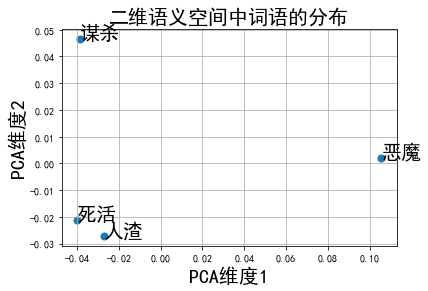

In [27]:
# 可视化

words = ['谋杀', '恶魔', '死活', '人渣']
vectors = [model.wv[word] for word in words]

from sklearn.decomposition import PCA     # 语义空间降维，用于展示词语在二维空间的相对位置

# 使用PCA进行降维
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(vectors)

import matplotlib.pyplot as plt     # 画图

# 绘制四个词语在二维空间的相对位置
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure()

# 取PCA降维结果中所有行的第一列和第二列数据绘制散点图，设置点的大小为50
plt.scatter(pca_result[:, 0], pca_result[:, 1], s = 50)

for i, word in enumerate(words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize = 20)

plt.xlabel('PCA维度1', fontsize = 20)
plt.ylabel('PCA维度2', fontsize = 20)
plt.title('二维语义空间中词语的分布', fontsize = 20)
plt.grid(True)
plt.show()

In [28]:
from gensim.models.callbacks import CallbackAny2Vec

class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 0
        self.loss_to_be_subed = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        loss_now = loss - self.loss_to_be_subed
        self.loss_to_be_subed = loss
        print('Loss after epoch {}: {}'.format(self.epoch, loss_now))
        self.epoch += 1
        
# 自己训练词嵌入模型
from gensim.models import Word2Vec

# 训练词嵌入模型
model = Word2Vec(
    corpus,     # 训练预料
    window = 5,     # 训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
    vector_size = 100,     # 自定义训练向量维度
    min_count = 1,     # 忽略所有总频数低于这个值的词语
    compute_loss=True, callbacks=[callback()],
    epochs = 50
)

# 保存训练好的模型
model.save('word2vec_ad.model')

Loss after epoch 0: 33106.08203125
Loss after epoch 1: 33048.36328125
Loss after epoch 2: 32779.0234375
Loss after epoch 3: 31730.078125
Loss after epoch 4: 30060.046875
Loss after epoch 5: 28031.734375
Loss after epoch 6: 26526.390625
Loss after epoch 7: 25227.625
Loss after epoch 8: 24525.625
Loss after epoch 9: 23858.1875
Loss after epoch 10: 23315.53125
Loss after epoch 11: 23222.1875
Loss after epoch 12: 22965.125
Loss after epoch 13: 22794.21875
Loss after epoch 14: 22540.21875
Loss after epoch 15: 22706.0
Loss after epoch 16: 22522.1875
Loss after epoch 17: 22313.53125
Loss after epoch 18: 22256.5
Loss after epoch 19: 22348.40625
Loss after epoch 20: 22456.75
Loss after epoch 21: 22253.0
Loss after epoch 22: 22049.8125
Loss after epoch 23: 22111.8125
Loss after epoch 24: 22145.9375
Loss after epoch 25: 22029.625
Loss after epoch 26: 21892.125
Loss after epoch 27: 22007.9375
Loss after epoch 28: 21793.75
Loss after epoch 29: 21861.625
Loss after epoch 30: 21815.8125
Loss after ep